<a href="https://colab.research.google.com/github/juanpinto1/TelecomX-Parte2/blob/main/Telecom_X_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import pandas as pd

# Raw GitHub URL for df_final.csv
github_raw_url = 'https://raw.githubusercontent.com/juanpinto1/TelecomX-Parte2/main/df_final.csv'

# Name for the local file to be saved in Colab
local_file_name = 'df_final.csv'

# Cargar el dataset desde la URL de GitHub
try:
    df = pd.read_csv(github_raw_url)
    print(f"Dataset '{local_file_name}' cargado exitosamente desde GitHub.")
    print("Primeras 5 filas del DataFrame:")
    print(df.head())

    # Guardar el DataFrame cargado como un archivo CSV localmente en Colab
    df.to_csv(local_file_name, index=False)
    print(f"\nDataset guardado exitosamente como '{local_file_name}' en el entorno local de Colab.")

except Exception as e:
    print(f"Error al cargar o guardar el dataset: {e}")

Dataset 'df_final.csv' cargado exitosamente desde GitHub.
Primeras 5 filas del DataFrame:
   customerID  Churn  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  0002-ORFBO      0  Female              0        1           1       9   
1  0003-MKNFE      0    Male              0        0           0       9   
2  0004-TLHLJ      1    Male              0        0           0       4   
3  0011-IGKFF      1    Male              1        1           0      13   
4  0013-EXCHZ      1  Female              1        1           0       3   

   PhoneService  MultipleLines InternetService  ...  DeviceProtection  \
0             1              0             DSL  ...                 0   
1             1              1             DSL  ...                 0   
2             1              0     Fiber optic  ...                 1   
3             1              0     Fiber optic  ...                 1   
4             1              0     Fiber optic  ...                 0   

   TechSupport

In [72]:
# Eliminar la columna customerID dado que no es relevante para el análisis o modelado y tambien se elimina
# Charges.Monthly debido a que esta el Charges.Total
df = df.drop(['customerID', 'Charges.Monthly'], axis=1)

# Identificar columnas categóricas para codificación One-Hot
categorical_cols = ['gender', 'InternetService', 'Contract', 'PaymentMethod']

# Aplicar codificación One-Hot a las columnas categóricas identificadas
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


# Mostrar información del DataFrame codificado para confirmar los tipos de datos
print(df_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Churn                                  7267 non-null   int64  
 1   SeniorCitizen                          7267 non-null   int64  
 2   Partner                                7267 non-null   int64  
 3   Dependents                             7267 non-null   int64  
 4   tenure                                 7267 non-null   int64  
 5   PhoneService                           7267 non-null   int64  
 6   MultipleLines                          7267 non-null   int64  
 7   OnlineSecurity                         7267 non-null   int64  
 8   OnlineBackup                           7267 non-null   int64  
 9   DeviceProtection                       7267 non-null   int64  
 10  TechSupport                            7267 non-null   int64  
 11  Stre

In [73]:
from sklearn.model_selection import train_test_split, KFold , cross_validate,StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.under_sampling import NearMiss


# Separar características (X) y la variable objetivo (y)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

modelo = DecisionTreeClassifier()
modelo.fit(X, y)
modelo.score(X, y)

print(f"La exactidud del modelo es de {modelo.score(X, y) * 100:.2f}%")

# Dividir los datos en conjuntos de entrenamiento y prueba
# Se usa stratify=y para asegurar que la proporción de clases en y sea la misma en train y test
X, X_test, y, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, random_state=42)



modelo = DecisionTreeClassifier()
modelo.fit(X_train, y_train)
print("\n--- Resultados del Modelo Random Forest ---")

print(f"La exactidud del modelo entrenamiento es de  {modelo.score(X_train, y_train) * 100:.2f}%")
print(f"La exactidud del modelo validacion  es de {modelo.score(X_val, y_val) * 100:.2f}%")




La exactidud del modelo es de 98.83%

--- Resultados del Modelo Random Forest ---
La exactidud del modelo entrenamiento es de  99.24%
La exactidud del modelo validacion  es de 72.93%


In [74]:
# Calcular la matriz de correlación
correlation_matrix = df_encoded.corr()

# Obtener las correlaciones con 'Churn' y ordenarlas
churn_correlations = correlation_matrix['Churn'].sort_values(ascending=False)

# Imprimir las correlaciones
print("Correlación de las variables con 'Churn' (ordenado):")
print(churn_correlations)

# Identificar variables con baja relevancia (correlación absoluta cercana a 0)
low_relevance_threshold = 0.09
low_relevance_vars = churn_correlations[abs(churn_correlations) < low_relevance_threshold]

print("\nVariables con muy baja relevancia (correlación absoluta < 0.09):")
print(low_relevance_vars)

Correlación de las variables con 'Churn' (ordenado):
Churn                                    1.000000
InternetService_Fiber optic              0.300949
PaymentMethod_Electronic check           0.294626
Cuentas_Diarias                          0.189825
PaperlessBilling                         0.186666
SeniorCitizen                            0.146733
StreamingTV                              0.062430
StreamingMovies                          0.060586
MultipleLines                            0.039343
PhoneService                             0.012571
gender_Male                             -0.009555
DeviceProtection                        -0.063452
OnlineBackup                            -0.080163
PaymentMethod_Mailed check              -0.090061
PaymentMethod_Credit card (automatic)   -0.131085
Partner                                 -0.148546
TechSupport                             -0.160440
Dependents                              -0.161384
OnlineSecurity                          -0.1668

In [75]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(X_train, y_train)
print(f"La exactidud del modelo entrenamiento es de  {modelo.score(X_train, y_train) * 100:.2f}%")
print(f"La exactidud del modelo validacion  es de {modelo.score(X_val, y_val) * 100:.2f}%")

La exactidud del modelo entrenamiento es de  87.65%
La exactidud del modelo validacion  es de 74.68%


In [76]:
y_previsto = modelo.predict(X_val)
matriz_confusion = confusion_matrix(y_val, y_previsto)
matriz_confusion
print(matriz_confusion)


[[943 204]
 [187 210]]



---Matriz de confusión

- 63.75% para entrenamiento, 21.25% para validación y 15% para prueba.-


array([0.75728155, 0.73279352, 0.76032389, 0.7805668 , 0.75708502])

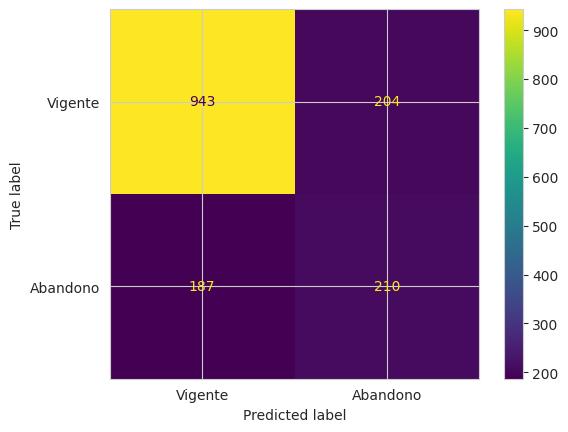

In [77]:
print("\n---Matriz de confusión")


print("\n- 63.75% para entrenamiento, 21.25% para validación y 15% para prueba.-")
visualizacion = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=['Vigente', 'Abandono'])
visualizacion.plot();


modelo = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_resultados = cross_validate(modelo, X, y, cv=kf)
cv_resultados

cv_resultados['test_score']



In [78]:
promedio = cv_resultados['test_score'].mean()
desvio_std = cv_resultados['test_score'].std()
print(f"El promedio de la exactitud del modelo es: {promedio * 100:.2f}%")
print(f"El desvio tipico del modelo es: {desvio_std * 100:.2f}%")
print(f"El intervalo de confianza es: [{promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}]")



El promedio de la exactitud del modelo es: 75.76%
El desvio tipico del modelo es: 1.52%
El intervalo de confianza es: [0.7272704670638909,0.7879498466030245]


In [79]:
def intervalo_confianza(resultados):
    promedio = resultados['test_score'].mean()
    desvio_std = resultados['test_score'].std()
    return f"El intervalo de confianza es: [{promedio-2*desvio_std:.2f},{min(promedio+2*desvio_std,1):.2f}]"

# Primer KFold (sin scoring explícito, por defecto es accuracy)
modelo = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_resultados_accuracy = cross_validate(modelo, X, y, cv=kf)

print("\n--- Resultados de Validación Cruzada (Accuracy) ---")
print(f"El promedio de la exactitud del modelo es: {cv_resultados_accuracy['test_score'].mean() * 100:.2f}%")
print(f"El desvio tipico del modelo es: {cv_resultados_accuracy['test_score'].std() * 100:.2f}%")
print(intervalo_confianza(cv_resultados_accuracy))


# Segundo KFold (con scoring="recall")
modelo = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_resultados_recall = cross_validate(modelo, X, y, cv=skf,scoring="recall")

print("\n--- Resultados de Validación Cruzada (Recall) ---")
print(f"El promedio del recall del modelo es: {cv_resultados_recall['test_score'].mean() * 100:.2f}%")
print(f"El desvio tipico del modelo es: {cv_resultados_recall['test_score'].std() * 100:.2f}%")
print(intervalo_confianza(cv_resultados_recall))


--- Resultados de Validación Cruzada (Accuracy) ---
El promedio de la exactitud del modelo es: 75.87%
El desvio tipico del modelo es: 1.47%
El intervalo de confianza es: [0.73,0.79]

--- Resultados de Validación Cruzada (Recall) ---
El promedio del recall del modelo es: 49.82%
El desvio tipico del modelo es: 3.54%
El intervalo de confianza es: [0.43,0.57]


In [80]:
cv_resultados_accuracy['test_score']

array([0.75728155, 0.73603239, 0.76194332, 0.78218623, 0.7562753 ])

In [81]:
cv_resultados_recall['test_score']

array([0.48427673, 0.50628931, 0.43710692, 0.52681388, 0.5362776 ])

In [82]:
df_encoded['Churn'].value_counts(normalize=True)

,proportion
Churn,
0,0.74281
1,0.25719


In [83]:
oversampling = SMOTE(random_state=42)
X_condatossinteticos, y_condatossinteticos = oversampling.fit_resample(X, y)



modelo = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_resultados = cross_validate(modelo, X_condatossinteticos, y_condatossinteticos, cv=skf,scoring="recall")

intervalo_confianza(cv_resultados)



'El intervalo de confianza es: [0.80,0.85]'

In [84]:
y_condatossinteticos.value_counts()

,count
Churn,
1,4588
0,4588


In [85]:

modelo = DecisionTreeClassifier()
pipeline = imbpipeline(steps=[('oversample', SMOTE()), ('modelo de arbol', modelo)])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_resultados = cross_validate(pipeline, X, y, cv=skf,scoring="recall")

intervalo_confianza(cv_resultados)


'El intervalo de confianza es: [0.40,0.60]'

In [86]:
modelo = DecisionTreeClassifier()
pipeline = imbpipeline(steps=[('undersample', NearMiss(version=3)), ('modelo de arbol', modelo)])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipeline, X, y, cv=skf,scoring="recall")

intervalo_confianza(cv_resultados)

'El intervalo de confianza es: [0.62,0.69]'

              precision    recall  f1-score   support

           0       0.86      0.71      0.78       810
           1       0.45      0.67      0.54       281

    accuracy                           0.70      1091
   macro avg       0.65      0.69      0.66      1091
weighted avg       0.75      0.70      0.72      1091

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       810
           1       0.60      0.48      0.54       281

    accuracy                           0.79      1091
   macro avg       0.72      0.69      0.70      1091
weighted avg       0.77      0.79      0.78      1091


ROC AUC Score: 0.8250252625104345

Importancia de las variables (Feature Importances del Modelo RandomForest):
Charges.Total                            0.186620
tenure                                   0.164861
Cuentas_Diarias                          0.155580
Contract_Two year                        0.063415
InternetSer

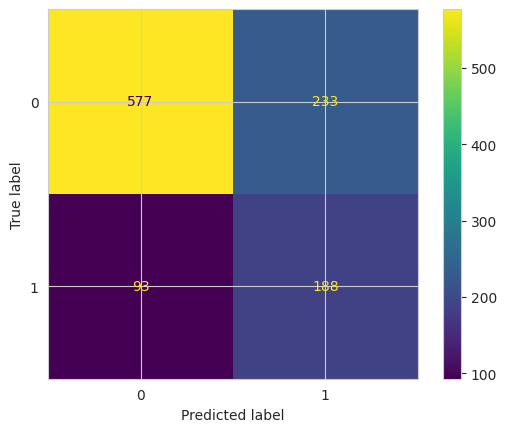

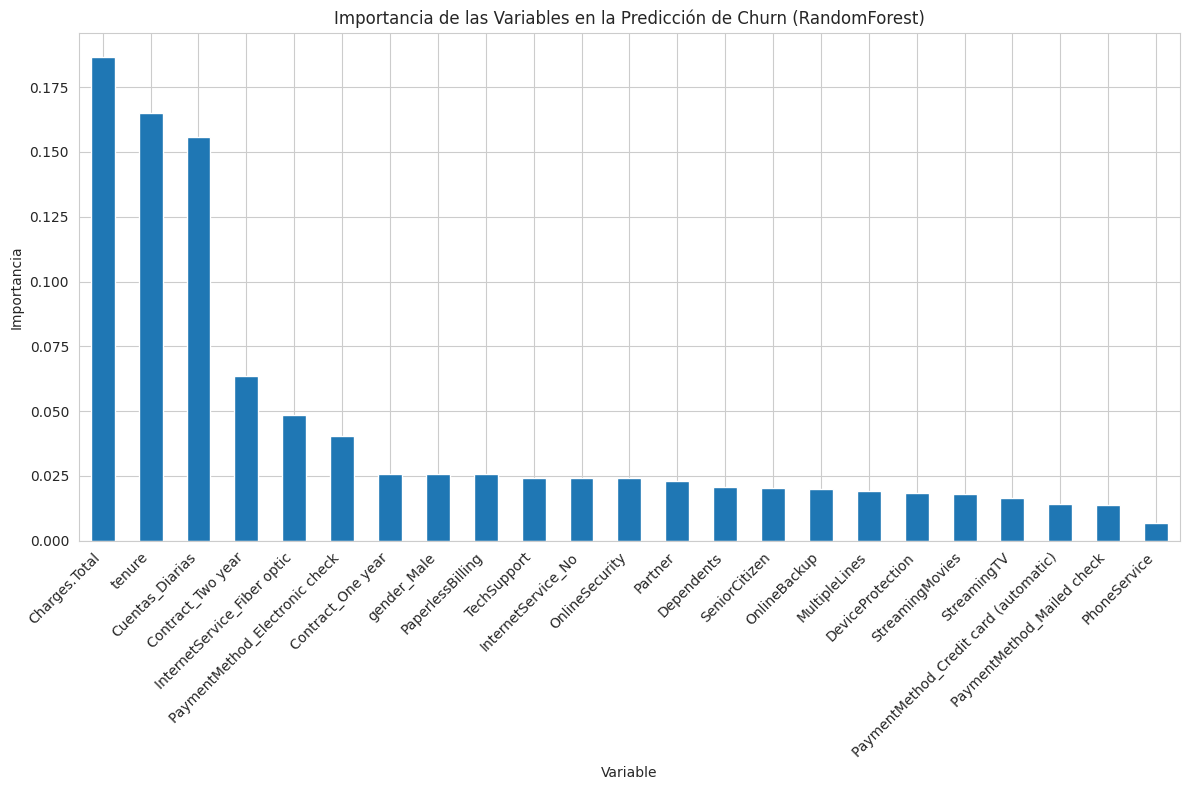

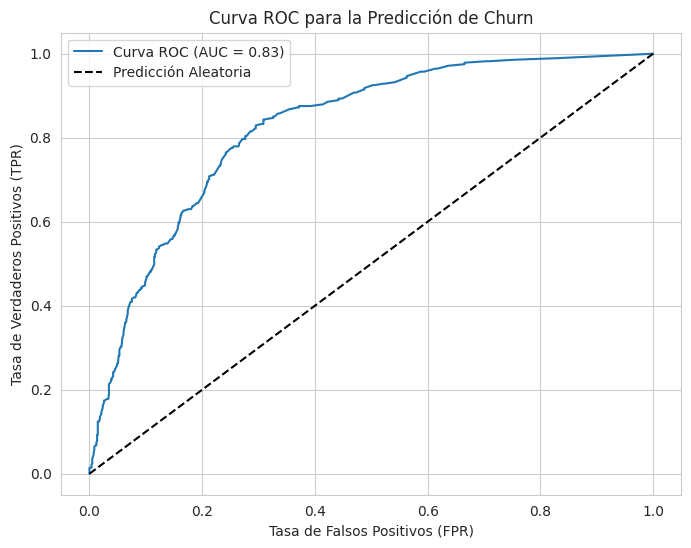

In [87]:
#PROBANDO EL MODELO

undersample = NearMiss(version=3)
X_train_undersample, y_train_undersample = undersample.fit_resample(X_train, y_train)

modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(X_train_undersample, y_train_undersample)
y_previsto = modelo.predict(X_test)

print(classification_report(y_test, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test, y_previsto);

# class_weight='balanced': para manejar un posible desequilibrio de clases en los datos de churn
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Predecir probabilidades en el conjunto de prueba (probabilidad de Churn = 1)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Predecir la clase de churn en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Evaluar el modelo
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nROC AUC Score:", roc_auc_score(y_test, y_pred_proba))


# Obtener la importancia de las características
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("\nImportancia de las variables (Feature Importances del Modelo RandomForest):")
print(feature_importances)

# Graficar la importancia de las características para una mejor visualización
plt.figure(figsize=(12, 8))
feature_importances.plot(kind='bar')
plt.title('Importancia de las Variables en la Predicción de Churn (RandomForest)')
plt.ylabel('Importancia')
plt.xlabel('Variable')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('feature_importances.png')

# Graficar la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Predicción Aleatoria')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC para la Predicción de Churn')
plt.legend()
plt.grid(True)
plt.savefig('roc_curve.png')

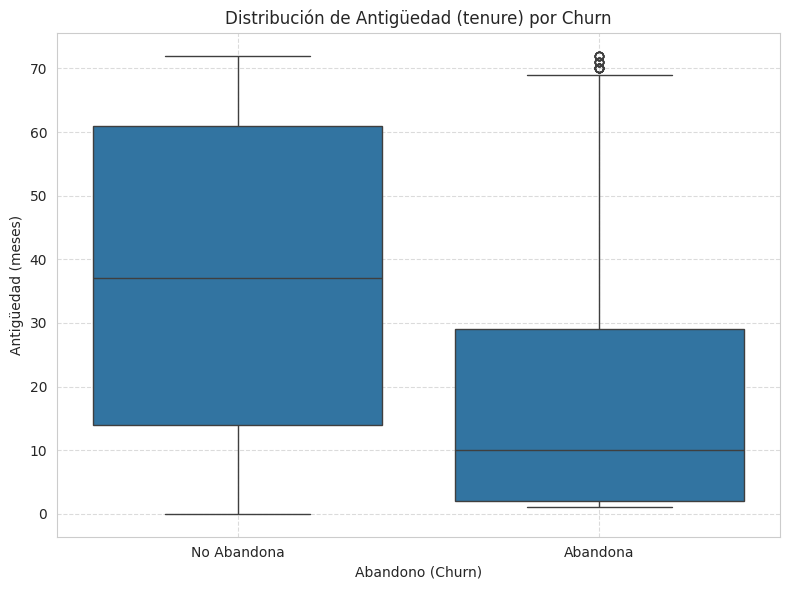

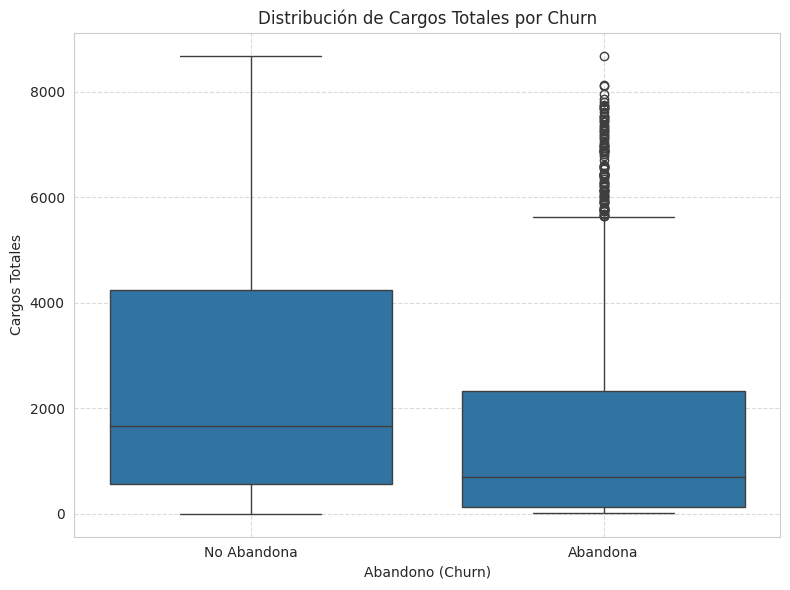

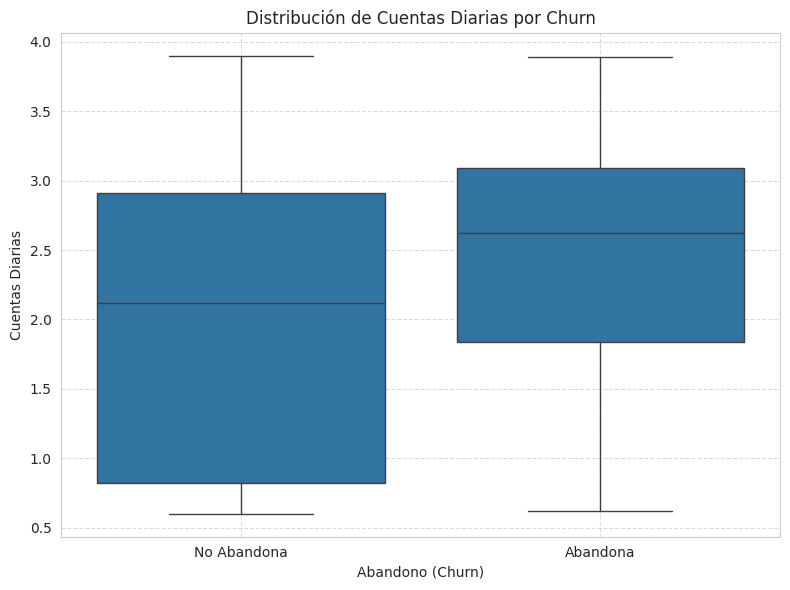


--- Fin de todas las operaciones ---


In [70]:
import seaborn as sns
sns.set_style("whitegrid") # Establecer estilo para los gráficos

# Boxplot para 'tenure' agrupado por 'Churn'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=df_encoded)
plt.title('Distribución de Antigüedad (tenure) por Churn')
plt.xlabel('Abandono (Churn)')
plt.ylabel('Antigüedad (meses)')
plt.xticks(ticks=[0, 1], labels=['No Abandona', 'Abandona'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('tenure_boxplot_by_churn.png')
plt.show()

# Boxplot para 'Charges.Total' agrupado por 'Churn'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Charges.Total', data=df_encoded)
plt.title('Distribución de Cargos Totales por Churn')
plt.xlabel('Abandono (Churn)')
plt.ylabel('Cargos Totales')
plt.xticks(ticks=[0, 1], labels=['No Abandona', 'Abandona'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('charges_total_boxplot_by_churn.png')
plt.show()

# Boxplot para 'Cuentas_Diarias' agrupado por 'Churn'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Cuentas_Diarias', data=df_encoded)
plt.title('Distribución de Cuentas Diarias por Churn')
plt.xlabel('Abandono (Churn)')
plt.ylabel('Cuentas Diarias')
plt.xticks(ticks=[0, 1], labels=['No Abandona', 'Abandona'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('cuentas_diarias_boxplot_by_churn.png')
plt.show()

print("\n--- Fin de todas las operaciones ---")

#Preguntas

###1. ¿Quiénes son los clientes con mayor riesgo de evasión?

Basado en la Importancia de las Variables del Modelo RandomForest y el conocimiento general del negocio de telecomunicaciones:

1º Charges.Total (Cargos Totales) - Importancia: 0.186620: Esta es la variable más influyente. Indica que la cantidad total que el cliente ha pagado a lo largo de su servicio es un predictor muy fuerte. Clientes con Charges.Total bajos (lo que a menudo se correlaciona con una baja antigüedad) tienen un riesgo significativamente mayor de abandono.

2º tenure (Antigüedad como Cliente) - Importancia: 0.164861: Los clientes con menor antigüedad tienen un riesgo considerablemente mayor de abandono. Esto subraya la importancia de la fidelización en las etapas iniciales de la relación.

3º Cuentas_Diarias (Cuentas Diarias) - Importancia: 0.155580: Aunque no se proporcionó una descripción específica para esta variable, su alta importancia sugiere que el patrón de "cuentas diarias" es muy relevante para la evasión. Un mayor valor en Cuentas_Diarias se asocia con un mayor riesgo de abandono.

4º Contract_Two year (Contrato de Dos Años) - Importancia: 0.063415: Tener un contrato de dos años es un fuerte factor protector. Clientes sin este tipo de compromiso a largo plazo (especialmente los de contrato mes a mes) tienen un riesgo mucho mayor.

5º InternetService_Fiber optic (Servicio de Internet Fibra Óptica) - Importancia: 0.048364: A pesar de ser un servicio de alta tecnología, los datos sugieren que los clientes de fibra óptica tienen una mayor propensión a la evasión. Esto podría indicar problemas de satisfacción o expectativas en este segmento.

Clientes de mayor riesgo de evasión son aquellos que presentan:

Baja antigüedad (tenure).

Bajos cargos totales acumulados (Charges.Total).

Patrones específicos en Cuentas_Diarias (un valor alto, según tu análisis anterior).

Contratos mes a mes (Contract_Month-to-month).

Servicio de Internet de Fibra Óptica (InternetService_Fiber optic).

Utilizan "Cheque Electrónico" como método de pago (PaymentMethod_Electronic check).

###2. ¿Qué variables influyen más en este comportamiento?

Las variables que ejercen la mayor influencia en el comportamiento de evasión, basándonos en las últimas Importancias de Features del Modelo RandomForest, son (ordenadas por importancia):

Charges.Total (0.186620): Es el indicador más potente, reflejando la lealtad y satisfacción general del cliente a lo largo de su servicio. Clientes con Charges.Total bajos son de alto riesgo.

tenure (Antigüedad como Cliente) (0.164861): La duración de la relación del cliente con la empresa es fundamental; menor antigüedad significa mayor riesgo.

Cuentas_Diarias (0.155580): Este comportamiento diario es un factor muy importante que requiere una comprensión más profunda de lo que representa para el negocio. Clientes con un mayor valor en Cuentas_Diarias se asocian a un mayor riesgo de abandono.

Contract_Two year (Contrato de Dos Años) (0.063415): Demuestra que los contratos a largo plazo son una fuerte señal de retención. La contraparte, Contract_Month-to-month, es un factor de alto riesgo.

InternetService_Fiber optic (Servicio de Internet Fibra Óptica) (0.048364): Destaca como una señal de riesgo, sugiriendo que la experiencia con este servicio es crítica.

PaymentMethod_Electronic check (Método de Pago: Cheque Electrónico) (0.040337): Este método de pago está consistentemente asociado con un mayor riesgo de evasión.

Contract_One year (Contrato de Un Año) (0.025870): Un compromiso intermedio que también contribuye a la retención.

gender_Male (Género Masculino) (0.025864): Aunque su impacto es menor, sugiere que el género puede tener una sutil influencia.

PaperlessBilling (Facturación sin Papel) (0.025763): Los clientes que eligen esta opción presentan un riesgo ligeramente superior.

TechSupport (Soporte Técnico) (0.024167): La disponibilidad y uso de soporte técnico son factores protectores contra la evasión.

InternetService_No (Sin Servicio de Internet) (0.024100): La ausencia de servicio de internet también tiene una relevancia en la predicción.

OnlineSecurity (Seguridad en Línea) (0.024084): Similar a TechSupport, los servicios de seguridad en línea contribuyen a la retención.

Factores de Riesgo Clave Resumidos:

Antigüedad Baja (tenure)

Cargos Totales Bajos (Charges.Total)

Contrato Mes a Mes (Contract_Month-to-month)

Servicio de Internet Fibra Óptica (InternetService_Fiber optic)

Método de Pago: Cheque Electrónico (PaymentMethod_Electronic check)

Altos valores en Cuentas_Diarias

###3. ¿Qué tipo de perfil necesita la empresa para mantenerse más cerca?

Para retener a los clientes y fomentar la lealtad, la empresa debería enfocarse en un perfil de cliente que es lo opuesto al perfil de alto riesgo, y aplicar los siguientes cuidados:

Perfil de Cliente Deseado (con menor riesgo de abandono):

Antigüedad Alta (tenure alto): Clientes leales con muchos años de servicio.

Contrato de Largo Plazo (especialmente Contract_Two year): Clientes con un compromiso contractual más largo.

Cargos Totales Elevados (Charges.Total altos): Clientes que han pagado una suma considerable a lo largo de su servicio.

Uso de Servicios de Seguridad y Soporte (OnlineSecurity, TechSupport, DeviceProtection): Los clientes que utilizan estos servicios son más estables.

Servicios de Internet DSL o sin servicio de internet (InternetService_DSL, InternetService_No): Estos perfiles muestran menor propensión al abandono que la fibra óptica.

Métodos de Pago Automáticos (transferencia bancaria o tarjeta de crédito): Estos métodos están asociados con menor abandono.

Cuidados y Estrategias que la Empresa Debe Aplicar:

Fidelización Temprana y Programas de Retención para Nuevos Clientes:

Identificar a los clientes con baja tenure (ej. los primeros 3-6 meses).

Ofrecer incentivos para contratos a más largo plazo (1 o 2 años) desde el inicio o al momento de la renovación.

Proporcionar un soporte al cliente excepcional durante los primeros meses para asegurar una experiencia positiva.

Manejo de Cargos y Valor Percibido:

Enfatizar el valor percibido del servicio en relación con los Charges.Total.

Considerar paquetes o descuentos que recompensen a los clientes por su antigüedad o por alcanzar ciertos umbrales de Charges.Total para fomentar la lealtad.

Mejora de la Experiencia del Servicio de Fibra Óptica:

Investigar las razones detrás del mayor abandono en clientes con InternetService_Fiber optic. ¿Es la calidad del servicio, el soporte, o las expectativas?

Implementar encuestas de satisfacción específicas para usuarios de fibra óptica y abordar proactivamente sus preocupaciones.

Optimización de Métodos de Pago:

Promover activamente métodos de pago como transferencia bancaria o tarjeta de crédito automática, que muestran menor riesgo de abandono.

Analizar las razones por las que los usuarios de cheque electrónico son más propensos a irse y ofrecer alternativas o incentivos para cambiar.

Promoción de Servicios Adicionales y Soporte:

Educar a los clientes sobre los beneficios de servicios como OnlineSecurity, TechSupport, y DeviceProtection.

Incentivar la adopción de estos servicios, ya que actúan como "frenos" al abandono.

Personalización y Comunicación Proactiva:

Utilizar el modelo predictivo para identificar clientes en alto riesgo de abandono y contactarlos proactivamente con ofertas personalizadas, soporte o encuestas de satisfacción antes de que decidan irse.

Desarrollar programas de lealtad que recompensen la antigüedad y los contratos de largo plazo.

Análisis Adicional de Cuentas_Diarias:

Dado su alta importancia, es crucial entender qué representa esta variable y cómo se relaciona con el comportamiento del cliente para desarrollar estrategias más específicas.